<a href="https://colab.research.google.com/github/aghnyap/bangkit-final-project/blob/master/bangk!t_sign_language_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1GFEfyU5pBYmsUI2GemgPHAvGoXa-yE19'
output = '3258-5337-bundle-archive.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GFEfyU5pBYmsUI2GemgPHAvGoXa-yE19
To: /content/3258-5337-bundle-archive.zip
65.6MB [00:00, 69.7MB/s]


'3258-5337-bundle-archive.zip'

In [ ]:
import os, signal
import zipfile

path = '/content/'
working_dir = os.path.join(path, '3258-5337-bundle-archive')

local_zip = os.path.join(path, output)
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(working_dir)
zip_ref.close()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Visualization
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import LabelBinarizer

In [ ]:
# Load MNIST dataset into pandas dataframes
train_df = pd.read_csv(os.path.join(working_dir, "sign_mnist_train.csv"))
test_df = pd.read_csv(os.path.join(working_dir, "sign_mnist_test.csv"))

In [ ]:
# Preview the training data
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
# Preview the test data
# test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
train_labels = train_df['label']
test_labels = test_df['label']

# Drop/delete 'label' column from dataframes
train_image = train_df.drop(labels=['label'], axis=1) 
test_image = test_df.drop(labels=['label'], axis=1)

In [ ]:
train_image.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
# Check training output for null and missing values
train_image.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
# Check test output for null and missing values
# test_image.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
# Normalize the input image so that each pixel value is between 0 to 1
train_image = train_image / 255.0
test_image = test_image / 255.0

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px, canal = 1)
train_image = train_image.values.reshape(-1, 28, 28, 1)
test_image = test_image.values.reshape(-1, 28, 28, 1)

In [ ]:
# Label encoding by transforming multi-class labels to binary labels
lb = LabelBinarizer()

train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

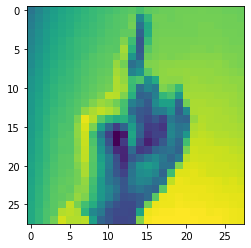

In [ ]:
# Some example from training data
g = plt.imshow(train_image[0][:,:,0])

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=True,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.2, # Randomly zoom image 
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(filters=75, kernel_size=(3,3), strides=1,
                         padding='same', activation='relu', input_shape = (28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=2,
                            padding='same'),
    keras.layers.Conv2D(filters=50, kernel_size=(3,3), strides=1,
                         padding='same', activation='relu'),
    keras.layers.Dropout(.2),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides = 2,
                            padding='same'),
    keras.layers.Conv2D(filters=25, kernel_size=(3,3), strides=1,
                         padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=2,
                            padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(units=24, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 50)         

In [ ]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
                                            monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
history = model.fit(datagen.flow(train_image, train_labels, batch_size=128),
                    epochs=20, 
                    validation_data=(test_image, test_labels),
                    callbacks=[learning_rate_reduction])

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


215/215 [==============================] - 101s 468ms/step - loss: 2.4827 - accuracy: 0.2365 - val_loss: 5.7035 - val_accuracy: 0.0287 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 102s 476ms/step - loss: 1.5874 - accuracy: 0.4748 - val_loss: 3.7491 - val_accuracy: 0.1499 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 104s 486ms/step - loss: 1.1090 - accuracy: 0.6248 - val_loss: 2.6274 - val_accuracy: 0.3799 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 105s 490ms/step - loss: 0.8676 - accuracy: 0.7025 - val_loss: 0.9652 - val_accuracy: 0.6912 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 106s 492ms/step - loss: 0.6936 - accuracy: 0.7611 - val_loss: 0.4477 - val_accuracy: 0.8356 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 106s 492ms/step - loss: 0.5937 - accuracy: 0.7945 - val_loss: 0.6253 - val_accuracy: 0.7846 - lr: 0.0010
Epoch 7/20
215/215 [==============================] - 105

In [ ]:
print("Final loss: {:.2f}".format(history.history['val_loss'][-1]))
print("Final accuracy: {:.2f}%".format(history.history['val_accuracy'][-1] * 100))

Final loss: 0.06
Final accuracy: 98.37%


In [ ]:
# Without data augmentation
 # history = model.fit(train_image, train_labels, batch_size=128, epochs=5, validation_data=(test_image, test_labels), verbose=2)

Text(0.5, 1.0, 'Training and validation loss')

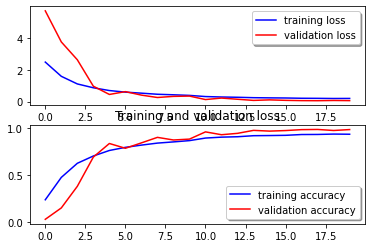

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss", axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.title('Training and validation loss')

In [ ]:
# Convert to a TensorFlow Lite model
export_dir = os.path.join(working_dir, "/output")
tf.saved_model.save(model, export_dir)
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# Save the TF Lite model
open("model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /output/assets


INFO:tensorflow:Assets written to: /output/assets


1060356

In [ ]:
# Download generated tflite
# from google.colab import files

# files.download('model.tflite')

In [ ]:
final_model = "model.tflite"
interpreter = tf.lite.Interpreter(model_path=final_model)
interpreter.allocate_tensors()

print("== Input details ==")
print("name:", interpreter.get_input_details()[0]['name'])
print("shape:", interpreter.get_input_details()[0]['shape'])
print("type:", interpreter.get_input_details()[0]['dtype'])

print("\n== Output details ==")
print("name:", interpreter.get_output_details()[0]['name'])
print("shape:", interpreter.get_output_details()[0]['shape'])
print("type:", interpreter.get_output_details()[0]['dtype'])

print("\nDUMP INPUT")
print(interpreter.get_input_details()[0])
print("\nDUMP OUTPUT")
print(interpreter.get_output_details()[0])

== Input details ==
name: conv2d_9_input
shape: [ 1 28 28  1]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [ 1 24]
type: <class 'numpy.float32'>

DUMP INPUT
{'name': 'conv2d_9_input', 'index': 0, 'shape': array([ 1, 28, 28,  1], dtype=int32), 'shape_signature': array([ 1, 28, 28,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}

DUMP OUTPUT
{'name': 'Identity', 'index': 33, 'shape': array([ 1, 24], dtype=int32), 'shape_signature': array([ 1, 24], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


In [ ]:
def augment(image): 
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[28, 28], method='bilinear', preserve_aspect_ratio=False, antialias=False, name=None)
  image = tf.squeeze(tf.image.rgb_to_grayscale(image))
  # image = tf.image.rgb_to_grayscale(image)
  return image

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1, 2, 1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1, 2, 2)
  plt.title('Augmented image')
  plt.imshow(augmented)

Prediction:  B


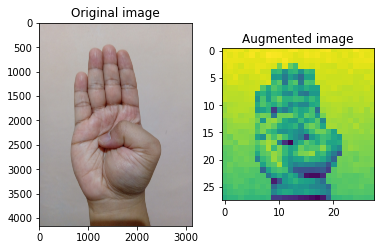

In [ ]:
from PIL import Image
from string import ascii_uppercase as char

uploaded = files.upload()

for fn in uploaded.keys():
  image_string = tf.io.read_file(path + fn)
  image = tf.image.decode_jpeg(image_string, channels=3)

  visualize(image, augment(image))

  input_details = interpreter.get_input_details()

  interpreter.set_tensor(input_details[0]['index'], tf.reshape(augment(image), [-1, 28, 28, 1]))
  interpreter.invoke()

  output_details = interpreter.get_output_details()
  output_data = interpreter.get_tensor(output_details[0]['index'])
  print("Prediction: ", char[np.argmax(output_data)])

# image_string = tf.io.read_file('IMG_20200620_204813.jpg')
# image = tf.image.decode_jpeg(image_string, channels=3)

# visualize(image, augment(image))

# input_details = interpreter.get_input_details()

# interpreter.set_tensor(input_details[0]['index'], tf.reshape(augment(image), [-1, 28, 28, 1]))
# interpreter.invoke()

# output_details = interpreter.get_output_details()
# output_data = interpreter.get_tensor(output_details[0]['index'])
# print("Prediction: ", char[np.argmax(output_data)])

In [ ]:
import tensorflow_hub as hub

# TODO: Define the model architecture for transfer learning
model_tl = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
    keras.layers.Conv2D(filters=75, kernel_size=(3,3), strides = 1,
                         padding = 'same', activation='relu', input_shape = (28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides = 2,
                            padding = 'same'),
    keras.layers.Conv2D(filters=50, kernel_size=(3,3), strides=1,
                         padding = 'same', activation='relu'),
    keras.layers.Dropout(.2),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2),strides = 2,
                            padding = 'same'),
    keras.layers.Conv2D(filters=25, kernel_size=(3,3), strides = 1,
                         padding = 'same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=2,
                            padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(units=24, activation='softmax')
])
model_tl.build([None, 224, 224, 3])
model_tl.summary()

In [ ]:
model_tl.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [ ]:
# os.kill(os.getpid(), signal.SIGKILL)